In [1]:
import pandas as pd
import numpy as np
import sklearn
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
data = pd.read_csv("./Data/water_potability.csv")
data.dropna(axis=0, inplace = True)
# what else do we need?

In [2]:
target = data["Potability"]
features = data.drop(columns = ["Potability"], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.25)

In [34]:
print(target.shape[0])
print(features.shape[0])

2011
2011


In [3]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import GridSearchCV
parameters = {
    "n_neighbors": [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
}

my_KNN_model = GridSearchCV(KNN(), param_grid = parameters)
#my_KNN_model = KNN(n_neighbors=k)
my_KNN_model.fit(x_train, y_train)
my_KNN_model.best_params_

{'n_neighbors': 18}

0.4135188866799205
0.5864811133200796


<AxesSubplot:>

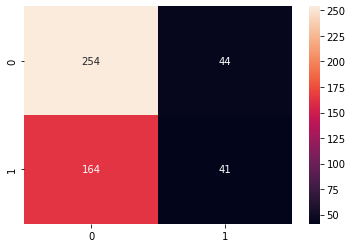

In [4]:
from sklearn.metrics import confusion_matrix

KNN_model_2 = KNN(n_neighbors = 10)
KNN_model_2.fit(x_train, y_train)
y_hat = KNN_model_2.predict(x_test)
mean_squared_error = (np.sum((y_test - y_hat)**2))/len(y_test)
print(mean_squared_error)
print(KNN_model_2.score(x_test,y_test)) #knn model --> very inaccurate
sns.heatmap(confusion_matrix(y_test, y_hat), annot = True, fmt ='g')

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc_param = {
    "n_estimators": [80,100,120,140,160,180,200,220],
    "criterion": ["gini", "entropy", "log_loss"]
}

rfc_test = GridSearchCV(RandomForestClassifier(), param_grid = rfc_param).fit(x_train,y_train)
rfc_test.best_params_

{'criterion': 'gini', 'n_estimators': 200}

0.34592445328031807
0.6540755467196819


<AxesSubplot:>

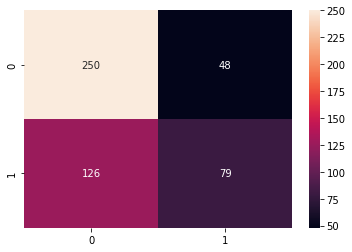

In [8]:
rfc_model = RandomForestClassifier(n_estimators = 200, criterion = "gini").fit(x_train,y_train)
y_hat_rfc = rfc_model.predict(x_test)
mean_squared_error = (np.sum((y_test - y_hat_rfc)**2))/len(y_test)
print(mean_squared_error)
print(rfc_model.score(x_test,y_test))
sns.heatmap(confusion_matrix(y_test, y_hat_rfc), annot = True, fmt ='g')

In [7]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

x,y = load_iris(return x,y = True)

#x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 0)

gnb = GaussianNB()

y_pred = gnb.fit(x_train, y_train).predict(x_test)

print("Number of mislabeled points out of a total %d points : %d")

SyntaxError: invalid syntax (1368406186.py, line 5)

In [31]:
from sklearn.svm import SVC
svc_param ={
    "kernel": ["linear", "poly", "rbf", "sigmoid", "precomputed"]
}

svc_test = GridSearchCV(SVC(),param_grid = svc_param).fit(x_train,y_train)
svc_test.best_params_

ValueError: Found input variables with inconsistent numbers of samples: [1508, 398]

In [22]:
from sklearn import datasets
cancer = datasets.load_breast_cancer()
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(cancer.data, cancer.target, test_size = 0.3, random_state = 109)

In [25]:
from sklearn import svm
clf = svm.SVC(kernel = 'linear')
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

In [26]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print("Precision:", metrics.precision_score(Y_test, Y_pred))
print("Recall:", metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.9649122807017544
Precision: 0.9811320754716981
Recall: 0.9629629629629629
